# Практическая работа 4

### Импорт библиотек

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Задание 1

#### 1.1

In [3]:
st = np.array([80, 98, 75, 91, 78])
gr = np.array([100, 82, 105, 89, 102])

np.corrcoef(st, gr)[0, 1]

-0.9999999999999998

#### 1.2

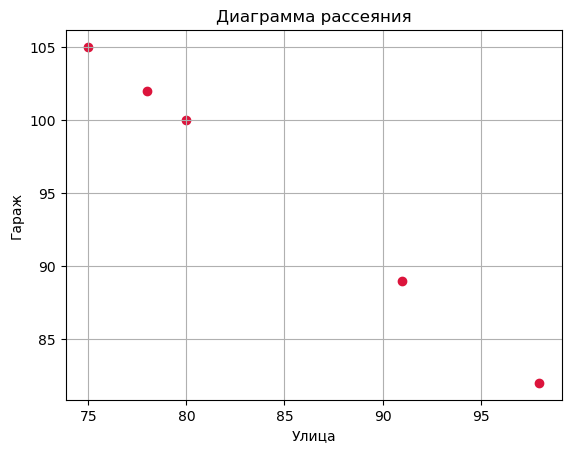

In [6]:
plt.grid(True)
plt.title("Диаграмма рассеяния")
plt.xlabel("Улица")
plt.ylabel("Гараж")

plt.scatter(st, gr, marker='o', color="crimson")

## Задание 2

#### 2.1

In [ ]:
data = pd.read_csv('')

## Задание 3

In [4]:
data = pd.read_csv('insurance.csv')

data.info()

regions = data.region.unique()
print(f"Список уникальных регионов: {regions}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Список уникальных регионов: ['southwest' 'southeast' 'northwest' 'northeast']


#### 3.1

In [6]:
groups = data.groupby('region').groups

southwest = data['bmi'][groups['southwest']]
southeast = data['bmi'][groups['southeast']]
northwest = data['bmi'][groups['northwest']]
northeast = data['bmi'][groups['northeast']]

anova_scipy = stats.f_oneway(southwest, southeast, northwest, northeast)
print(f"Тест ANOVA через scipy:\n{anova_scipy}")

Тест ANOVA через scipy:
F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)


#### 3.2

In [34]:
model = ols('bmi ~ region', data=data).fit()
anova_stats = sm.stats.anova_lm(model, typ = 2)
print(f"Тест ANOVA через statsmodels:\n{anova_stats}")

Тест ANOVA через statsmodels:
                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


#### 3.3

In [8]:
regions_stu = []
for r1 in range(3):
    for r2 in range(r1+1, 4):
        regions_stu.append((regions[r1], regions[r2]))

for r1, r2 in regions_stu:
    test_result = stats.ttest_ind(data['bmi'][groups[r1]], data['bmi'][groups[r2]])
    print(f"R1: {r1}, R2 {r2}\nРезультат: {test_result}")

R1: southwest, R2 southeast
Результат: Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
R1: southwest, R2 northwest
Результат: Ttest_indResult(statistic=3.2844171500398582, pvalue=0.001076958496307695)
R1: southwest, R2 northeast
Результат: Ttest_indResult(statistic=3.1169000930045923, pvalue=0.0019086161671573072)
R1: southeast, R2 northwest
Результат: Ttest_indResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19)
R1: southeast, R2 northeast
Результат: Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)
R1: northwest, R2 northeast
Результат: Ttest_indResult(statistic=0.060307727183293185, pvalue=0.951929170821864)


#### 3.4

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


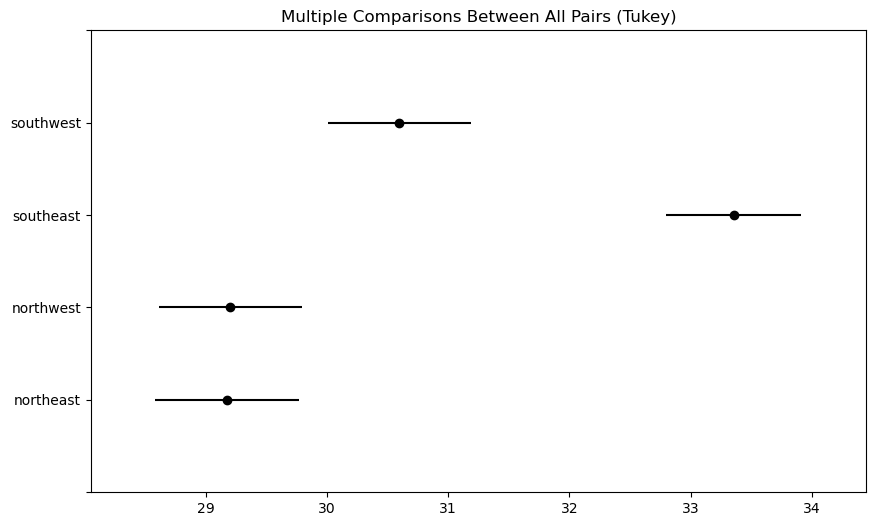

In [11]:
tukey = pairwise_tukeyhsd(endog= data['bmi'], groups = data['region'], alpha=0.05)
tukey.plot_simultaneous()
plt.vlines(x = 49.57, ymin= -0.5, ymax = 4.5, color = 'green')
tukey.summary()

#### 3.5

In [14]:
model2 = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=data).fit()
anova_stats2 = sm.stats.anova_lm(model2, typ=2)
print(f"Двухфакторный тест ANOVA через statsmodels:\n{anova_stats2}")

Двухфакторный тест ANOVA через statsmodels:
                        sum_sq      df          F        PR(>F)
C(region)          4034.975135     3.0  39.398134  2.163195e-24
C(sex)               86.007035     1.0   2.519359  1.126940e-01
C(region):C(sex)    174.157808     3.0   1.700504  1.650655e-01
Residual          45404.154911  1330.0        NaN           NaN


#### 3.6

group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.2706,1.6711,False
northeast / female,northwest / female,-0.0464,1.0,-2.0142,1.9215,False
northeast / female,northwest / male,-0.2042,1.0,-2.1811,1.7728,False
northeast / female,southeast / female,3.3469,0.0,1.41,5.2839,True
northeast / female,southeast / male,4.6657,0.0,2.7634,6.568,True
northeast / female,southwest / female,0.7362,0.9497,-1.2377,2.71,False
northeast / female,southwest / male,1.8051,0.1007,-0.1657,3.776,False
northeast / male,northwest / female,0.2534,0.9999,-1.7083,2.2152,False
northeast / male,northwest / male,0.0956,1.0,-1.8752,2.0665,False
northeast / male,southeast / female,3.6467,0.0,1.7159,5.5775,True


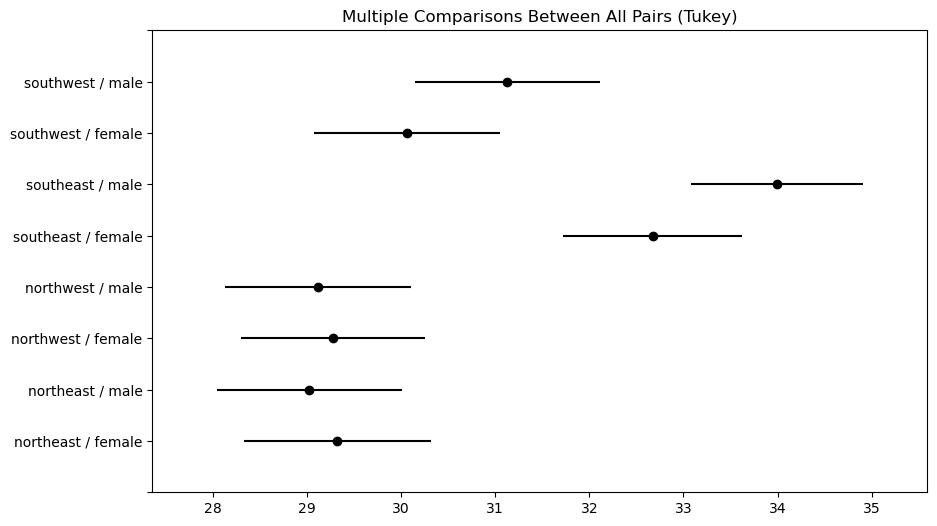

In [17]:
data['combination'] = data.region + " / " + data.sex
tukey = pairwise_tukeyhsd(endog= data['bmi'], groups = data['combination'], alpha=0.05)
tukey.plot_simultaneous()
tukey.summary()